In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
bids_df = pd.read_csv('../input/facebook-recruiting-iv-human-or-bot/bids.csv.zip')
train_df = pd.read_csv('../input/facebook-recruiting-iv-human-or-bot/train.csv.zip')
test_df = pd.read_csv('../input/facebook-recruiting-iv-human-or-bot/test.csv.zip')

### Missing values

In [33]:
bids_df.shape

(7656334, 9)

In [34]:
bids_df.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [35]:
missing_percent = bids_df['country'].isnull().mean()
print(f"Percentage of missing data in country column: {missing_percent*100: .2f}%")

Percentage of missing data in country column:  0.12%


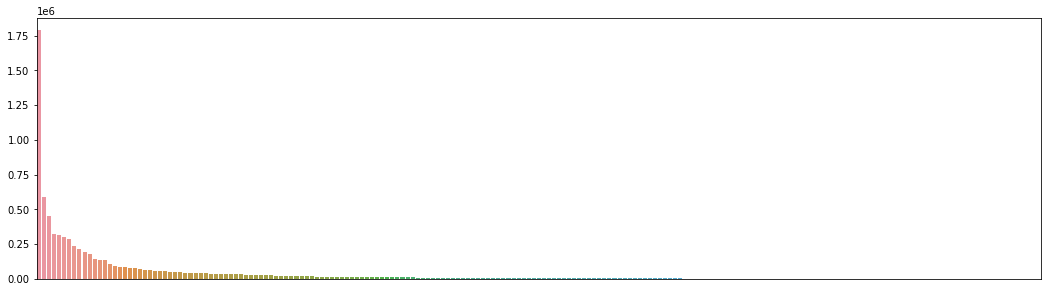

In [36]:
unique_countries = bids_df['country'].value_counts()

fig, ax = plt.subplots(figsize = (18, 4.8))
countries_distribution = sns.barplot(x = unique_countries.index, y = unique_countries.values, ax = ax)                        
ax.get_xaxis().set_visible(False)

plt.show()

In [37]:
bids_df['country'] = bids_df['country'].fillna(bids_df['country'].mode()[0])

# Feature Engineering

### Features of unique counts using .nunique()

In [38]:
bidder_unique = bids_df.groupby("bidder_id").nunique().reset_index()
bidder_unique.head()
pd.set_option('display.max_rows', None)

# 顯示完整的 DataFrame
print(bidder_unique)

# 恢復預設選項，以免影響後續的 DataFrame 顯示
pd.reset_option('display.max_rows')

                                  bidder_id  bid_id  auction  merchandise  \
0     001068c415025a009fee375a12cff4fcnht8y       1        1            1   
1     002d229ffb247009810828f648afc2ef593rb       2        1            1   
2     0030a2dd87ad2733e0873062e4f83954mkj86       1        1            1   
3     003180b29c6a5f8f1d84a6b7b6f7be57tjj1o       3        3            1   
4     00486a11dff552c4bd7696265724ff81yeo9v      20       13            1   
5     0051aef3fdeacdadba664b9b3b07e04e4coc6      68        5            1   
6     0053b78cde37c4384a20d2da9aa4272aym4pb   10939      408            1   
7     0061edfc5b07ff3d70d693883a38d370oy4fs     134       38            1   
8     00862324eb508ca5202b6d4e5f1a80fc3t3lp       5        1            1   
9     009479273c288b1dd096dc3087653499lrx3c       1        1            1   
10    009cee781e8414f7fb55b2f92157e9dbu0y6o       5        2            1   
11    00a0517965f18610417ee784a05f494d4dw6e     141       74            1   

In [39]:
train_set = train_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
train_set = train_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
train_set = train_set.fillna(0)

test_set = test_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
test_set = test_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
test_set = test_set.fillna(0)

train_set.head()

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0


### Features generated from first-differencing using .diff()

In [40]:
time_df = bids_df.sort_values(['bidder_id', 'time'])
time_df.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
7140567,7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,mobile,phone257,9705974315789473,id,115.47.140.180,vasstdc27m7nks3
2597846,2597846,00486a11dff552c4bd7696265724ff81yeo9v,no958,home goods,phone4,9632636526315789,ng,143.118.40.162,vasstdc27m7nks3
2599005,2599005,00486a11dff552c4bd7696265724ff81yeo9v,6plix,home goods,phone4,9632641157894736,ng,143.118.40.162,vasstdc27m7nks3
2750709,2750709,00486a11dff552c4bd7696265724ff81yeo9v,gst86,home goods,phone45,9633339684210526,ng,54.212.177.220,0wfuwlacucr1cdl


In [41]:
firstdiff = time_df.groupby('bidder_id')[['time']].diff()

# pd.set_option('display.max_rows', None)
print(firstdiff)
# 恢復預設選項，以免影響後續的 DataFrame 顯示
# pd.reset_option('display.max_rows')

# firstdiff.head(10)

                 time
7179832           NaN
1281292           NaN
1281311  1.052632e+08
6805028           NaN
3967330           NaN
...               ...
2336021  5.631579e+09
2337626  8.473684e+09
2344645  3.863158e+10
2350507  3.157895e+10
6989098           NaN

[7656334 rows x 1 columns]


In [42]:
time_df['first_diff'] = firstdiff
firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
firstdiff_feat.head()

,bidder_id,first_diff
1281311,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,6.058642e+13
7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,5.369263e+12
2599005,00486a11dff552c4bd7696265724ff81yeo9v,4.631579e+09
2750709,00486a11dff552c4bd7696265724ff81yeo9v,6.985263e+11


We can generate some features using common aggregate functions such as mean, median, minimum and maximum.

In [43]:
bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals.head()

,bidder_id,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,0.000000e+00,1.052632e+08,1.052632e+08,1.052632e+08,0.000000e+00
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.297784e+13,3.904443e+13,5.369263e+12,3.297784e+13,6.058642e+13,2.760858e+13
2,00486a11dff552c4bd7696265724ff81yeo9v,4.018413e+12,1.153730e+13,3.684211e+08,9.177368e+11,5.094174e+13,1.696763e+12
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,1.635106e+11,5.770740e+11,5.263158e+07,2.736842e+09,3.792368e+12,1.228947e+10
4,0053b78cde37c4384a20d2da9aa4272aym4pb,7.065316e+09,4.784394e+11,0.000000e+00,3.684211e+08,5.002753e+13,1.000000e+09


When adding the above features to our training and test datasets, we fill missing values for the concurrent bids with 0 simply because the bidders do not have any.

For the first-difference features, we fill the missing values with the median values because these bidders do not have any bid information.

In [44]:
train_set = train_set.merge(bid_intervals, on='bidder_id', how='left')
train_set = train_set.fillna(train_set.median())

test_set = test_set.merge(bid_intervals, on='bidder_id', how='left')
test_set = test_set.fillna(test_set.median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [45]:
concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
concurrent_bids.head()

,bidder_id,num_concurrent_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,728
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,29
2,00b519ec8ed5e370328451379bb708a306eoj,1
3,00e0f614d9dd32dd27f6080f472d2934emlos,15
4,019cf2d366df756c092c91e26f406acdozha7,1


In [46]:
train_set = train_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

### Features generated from time using .first()

In [47]:
first_bid = bids_df.sort_values(['auction', 'time'])
first_bid = first_bid.groupby('auction').first().reset_index()
first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
first_bid.head()

,bidder_id,num_first_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8


In [48]:
last_bid = bids_df.sort_values(['auction', 'time'], ascending = [True, False])
last_bid = last_bid.groupby('auction').first().reset_index()
last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
last_bid.head()

,bidder_id,num_last_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,6
1,00b519ec8ed5e370328451379bb708a306eoj,1
2,00e0f614d9dd32dd27f6080f472d2934emlos,3
3,01067975436d123f717ee5aba0dd4bbfa0937,1
4,0113d101ec6aabd354adac645a1ec3e82ln88,1


In [49]:
train_set = train_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
train_set = train_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

### Features by other hypotheses

##### Ratio of bids in first half to second half of auction

In [50]:
auct_duration = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})
auct_duration['auct_duration'] = auct_duration['max'] - auct_duration['min']
auct_duration.head()

,auction,max,min,auct_duration
0,00270,9709212894736842,9699049894736842,10163000000000
1,008vv,9760397157894736,9759369421052631,1027736842105
2,00cwr,9698636578947368,9695641631578947,2994947368421
3,00do0,9759865210526315,9759323842105263,541368421052
4,00hjy,9772723842105263,9759410368421052,13313473684211


In [51]:
time_ratio = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
time_ratio = time_ratio.merge(auct_duration, on = 'auction', how = 'left')
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000


In [52]:
time_ratio['temp'] = time_ratio['time'] - time_ratio['auct_duration'] / 2
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15


In [53]:
time_ratio['firsthalf'] = time_ratio['temp'] < time_ratio['min']
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp,firsthalf
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15,True
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15,True
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15,True
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15,True
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15,True


In [54]:
ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})
ratio_firsthalf['num_secondhalf_bids'] = ratio_firsthalf['num_total_bids'] - ratio_firsthalf['num_firsthalf_bids']
ratio_firsthalf['percent_firsthalf_bids'] = ratio_firsthalf['num_firsthalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf['percent_secondhalf_bids'] = ratio_firsthalf['num_secondhalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf = ratio_firsthalf.drop('num_total_bids', axis = 1)
ratio_firsthalf.head()

,bidder_id,num_firsthalf_bids,num_secondhalf_bids,percent_firsthalf_bids,percent_secondhalf_bids
0,001068c415025a009fee375a12cff4fcnht8y,0,1,0.000000,1.000000
1,002d229ffb247009810828f648afc2ef593rb,2,0,1.000000,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,0.000000,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,2,1,0.666667,0.333333
4,00486a11dff552c4bd7696265724ff81yeo9v,15,5,0.750000,0.250000


In [55]:
train_set = train_set.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

##### Max number of bids in an auction

Since the bots' aim is to win the auction, by assuming that a bot will not give up an auction, the bot should realistically make more bids for any auction.

In [56]:
max_bids_in_auct = bids_df.groupby(['bidder_id', 'auction']).count().reset_index()[['bidder_id', 'auction', 'bid_id']].rename(columns = {'bid_id': 'max_bids_in_auct'})
max_bids_in_auct = max_bids_in_auct[['bidder_id', 'max_bids_in_auct']].groupby('bidder_id').max().reset_index()
max_bids_in_auct.head()

,bidder_id,max_bids_in_auct
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3


In [57]:
train_set = train_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)

##### Max number of bids in across devices

We find out the maximum number of bids made using the same device by a bidder and find out whether humans and bots have different behavior when it comes to switching devices.

In [58]:
device = bids_df.groupby(['bidder_id', 'device']).nunique()[['bid_id', 'auction']].reset_index().rename(columns = {'bid_id': 'max_bids_per_device', 'auction': 'num_auct_per_device'})
device = device.groupby('bidder_id').max().reset_index()
device['max_bids_per_device_per_auct'] = device['max_bids_per_device'] / device['num_auct_per_device']
device = device[['bidder_id', 'max_bids_per_device', 'max_bids_per_device_per_auct']]
device.head()

,bidder_id,max_bids_per_device,max_bids_per_device_per_auct
0,001068c415025a009fee375a12cff4fcnht8y,1,1.0
1,002d229ffb247009810828f648afc2ef593rb,1,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,7,1.0


In [59]:
train_set = train_set.merge(device, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(device, on='bidder_id', how='left').fillna(0)

### Feature transformations

In [60]:
train_set['percent_concurrent_bids'] = train_set['num_concurrent_bids'] / train_set['num_bids']
train_set['bids_per_auct'] = train_set['num_bids'] / train_set['num_auct']
train_set['bids_per_device'] = train_set['num_bids'] / train_set['num_device_type']
train_set['bids_per_url'] = train_set['num_bids'] / train_set['num_url']
train_set['device_per_auct'] = train_set['num_device_type'] / train_set['num_auct']
train_set['ip_per_ctry'] = train_set['num_ip'] / train_set['num_ctry']
train_set['percent_max_bids'] = train_set['max_bids_per_device'] / train_set['num_bids']

train_set = train_set.fillna(0)

test_set['percent_concurrent_bids'] = test_set['num_concurrent_bids'] / test_set['num_bids']
test_set['bids_per_auct'] = test_set['num_bids'] / test_set['num_auct']
test_set['bids_per_device'] = test_set['num_bids'] / test_set['num_device_type']
test_set['bids_per_url'] = test_set['num_bids'] / test_set['num_url']
test_set['device_per_auct'] = test_set['num_device_type'] / test_set['num_auct']
test_set['ip_per_ctry'] = test_set['num_ip'] / test_set['num_ctry']
test_set['percent_max_bids'] = test_set['max_bids_per_device'] / test_set['num_bids']

test_set = test_set.fillna(0)

### Outliers

There are outliers, with 5 bots having only a single bid. We remove them as they may affect model performance badly.

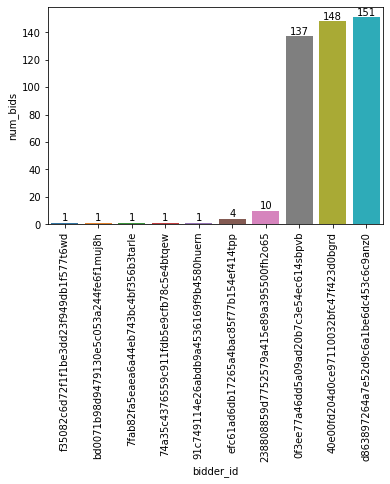

In [61]:
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = train_set[train_set['outcome'] == 1].sort_values('num_bids').head(10),
                               x = 'bidder_id',
                               y = 'num_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

plt.show()

In [62]:
train_set[train_set['outcome'] == 1].sort_values('num_bids').head(6)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
615,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
775,bd0071b98d9479130e5c053a244fe6f1muj8h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
392,7fab82fa5eaea6a44eb743bc4bf356b3tarle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1669,74a35c4376559c911fdb5e9cfb78c5e4btqew,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1102,91c749114e26abdb9a4536169f9b4580huern,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
148,efc61ad6db17265a4bac85f77b154ef414tpp,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.333333,4.0,1.5,1.5,0.5


In [63]:
train_set = train_set.drop([615, 775, 392, 1669, 1102], axis = 0)

### Checking the significance of features

We compute the mean of each feature for a human and a bot. One interesting observation is that both humans and bots only bidded for one type of merchandise. The value for humans is skewed due to humans with no bid data.

We can investigate the feature, merchandise, further to see if encoding can be performed.

In [64]:
train_set.groupby('outcome').mean().T

outcome,0.0,1.0
num_bids,1.392046e+03,4.208276e+03
num_auct,5.718901e+01,1.523878e+02
num_merch_type,9.853403e-01,1.000000e+00
num_device_type,7.282461e+01,1.719082e+02
num_time,1.157949e+03,3.857806e+03
num_ctry,1.240000e+01,2.762245e+01
num_ip,5.724309e+02,2.509571e+03
num_url,3.300979e+02,5.723163e+02
mean_diff,2.915060e+12,5.332332e+10
std_diff,4.195499e+12,5.086255e+11


In [65]:
temp_df = bids_df.merge(train_df, on = 'bidder_id', how = 'left').dropna()
temp_df.groupby(['outcome', 'merchandise']).count()[['bid_id']].sort_values(['outcome', 'bid_id'], ascending = False)

bid_id
outcome merchandise             
1.0     sporting goods    230326
        mobile            105138
        jewelry            37101
        home goods         18708
        computers          11667
        office equipment    7967
        books and music     1509
0.0     sporting goods    939398
        jewelry           555634
        mobile            492350
        home goods        389249
        office equipment  160671
        furniture          87807
        books and music    13733
        auto parts          9757
        computers           9733
        clothing             476

In [66]:
train_set = train_set.drop('num_merch_type', axis = 1)

test_set = test_set.drop('num_merch_type', axis = 1)

In [67]:
all_features = train_set.columns.drop(['bidder_id', 'outcome'])
all_features

Index(['num_bids', 'num_auct', 'num_device_type', 'num_time', 'num_ctry',
       'num_ip', 'num_url', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_concurrent_bids', 'num_first_bid',
       'num_last_bid', 'num_firsthalf_bids', 'num_secondhalf_bids',
       'percent_firsthalf_bids', 'percent_secondhalf_bids', 'max_bids_in_auct',
       'max_bids_per_device', 'max_bids_per_device_per_auct',
       'percent_concurrent_bids', 'bids_per_auct', 'bids_per_device',
       'bids_per_url', 'device_per_auct', 'ip_per_ctry', 'percent_max_bids'],
      dtype='object')

Another way to check the significance of the features is to use a density plot. From the plots below, the features num_url, num_concurrent_bids, num_firsthalf_bids, max_bids_per_device have similar distributions for both human and bot. Hence, we choose to exclude them from our model as they may not help to differentiate between a human and a bot well.

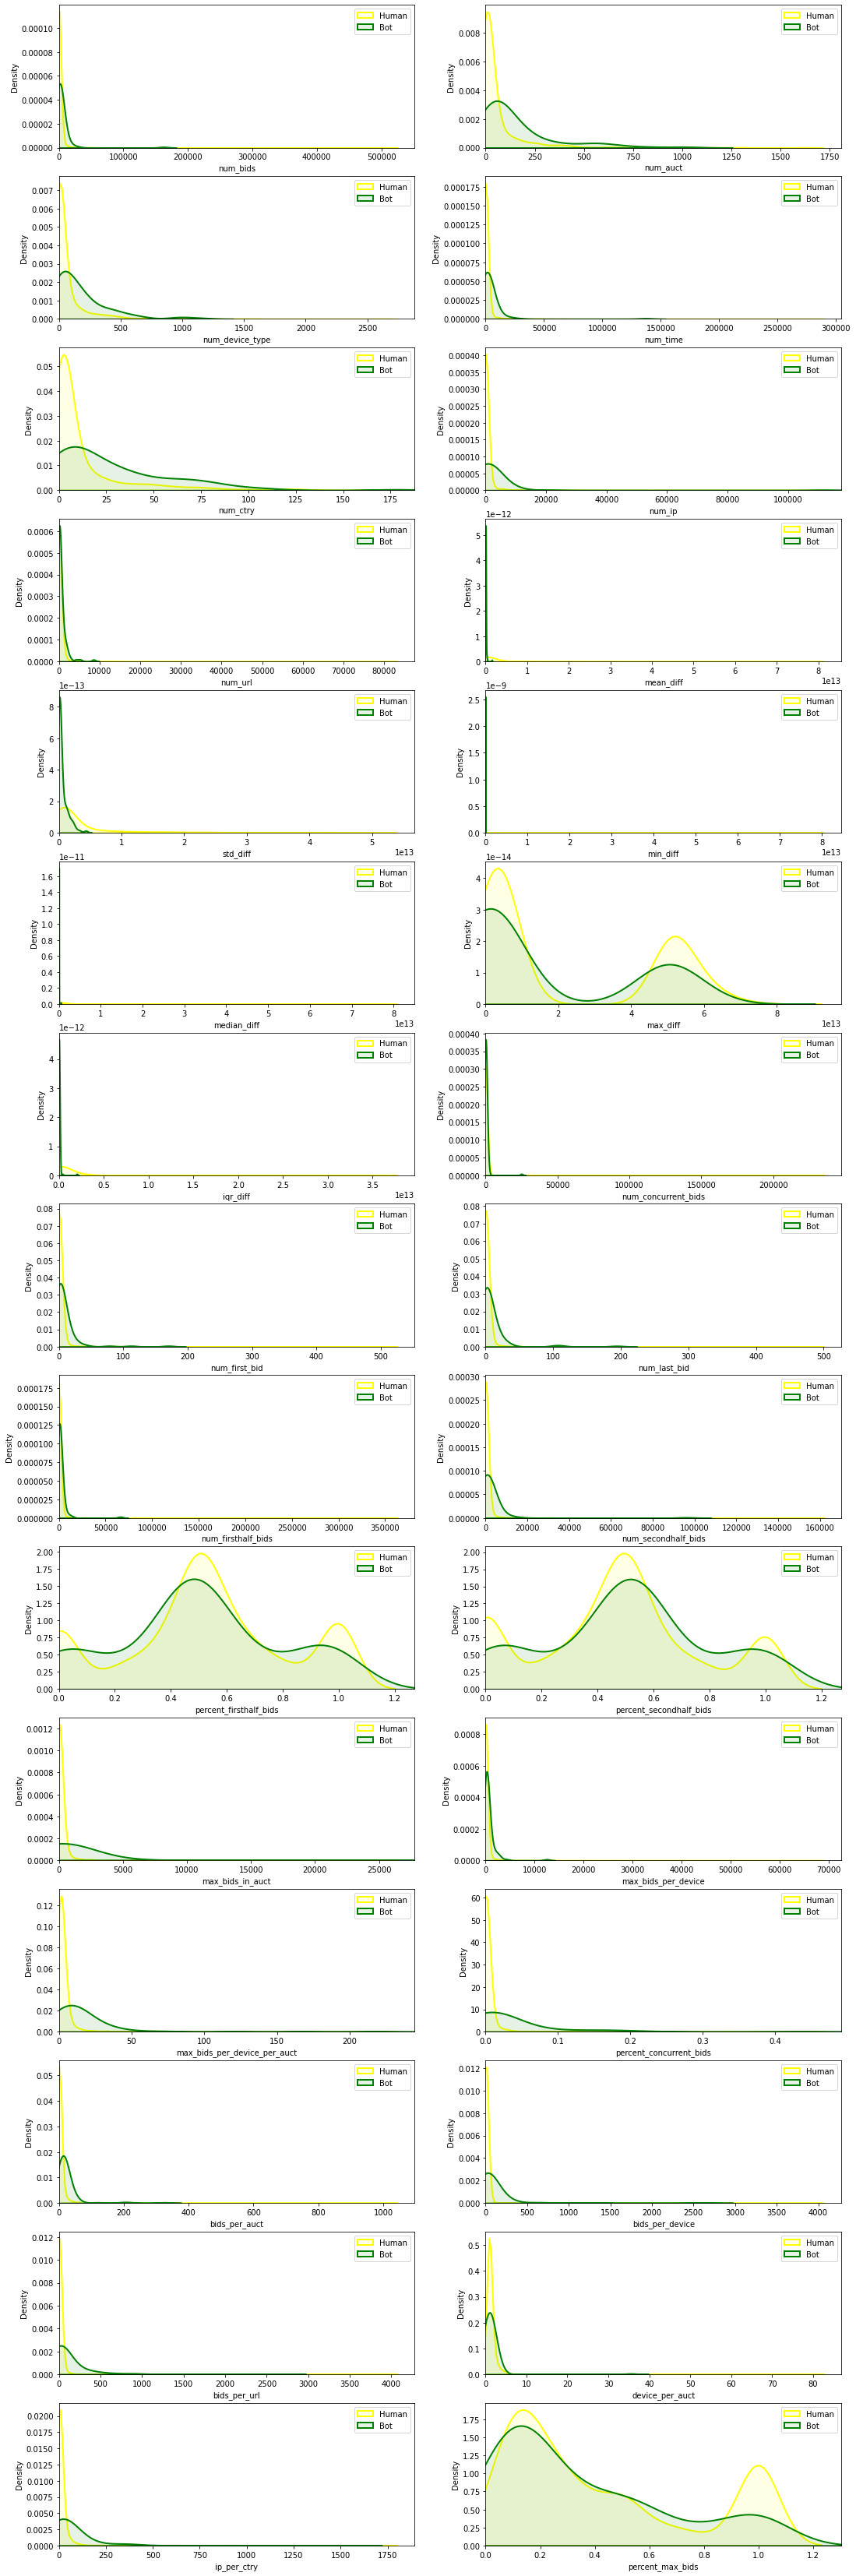

In [85]:
nrows = 15
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 60))
for i, column in enumerate(all_features):
    humans = sns.kdeplot(data = train_set[train_set['outcome'] == 0],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'yellow',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Human').set_xlim(left = 0)
    bots = sns.kdeplot(data = train_set[train_set['outcome'] == 1],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'green',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Bot').set_xlim(left = 0)
    axes[i // ncols,i % ncols].legend()
    
plt.show()

# Model Validation

In [69]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from time import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

### Imbalanced data

In [70]:
train_set['outcome'].value_counts()

0.0    1910
1.0      98
Name: outcome, dtype: int64

Due to imbalanced data, we perform over-sampling using RandomOverSampler.

Afterwards, we choose to do ensemble averaging of multiple Random Forest models to reduce the variance of our predictions. We do that by setting different random_state for each model. We then perform hyperparameter tuning for each model separately using GridSearchCV.

### Initialize training/test data and models

In [71]:
feature_col = train_set.columns.drop(['bidder_id', 'outcome',
                                     'num_url',  'num_concurrent_bids',  'num_firsthalf_bids', 'max_bids_per_device'
                                     ])
print(feature_col)

X = train_set[feature_col]
y = train_set['outcome']

X_kaggle = test_set[feature_col]

Index(['num_bids', 'num_auct', 'num_device_type', 'num_time', 'num_ctry',
       'num_ip', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_first_bid', 'num_last_bid',
       'num_secondhalf_bids', 'percent_firsthalf_bids',
       'percent_secondhalf_bids', 'max_bids_in_auct',
       'max_bids_per_device_per_auct', 'percent_concurrent_bids',
       'bids_per_auct', 'bids_per_device', 'bids_per_url', 'device_per_auct',
       'ip_per_ctry', 'percent_max_bids'],
      dtype='object')


We first initialize the base models and find out the AUC as reference.

In [72]:
rf1 = RandomForestClassifier(random_state = 0)
rf2 = RandomForestClassifier(random_state = 123)
rf3 = RandomForestClassifier(random_state = 456)
rf4 = RandomForestClassifier(random_state = 789)
rf5 = RandomForestClassifier(random_state = 999)

ros = RandomOverSampler(sampling_strategy = 0.1, random_state = 456)

pp1 = make_pipeline(ros, rf1)
pp2 = make_pipeline(ros, rf2)
pp3 = make_pipeline(ros, rf3)
pp4 = make_pipeline(ros, rf4)
pp5 = make_pipeline(ros, rf5)

base_models = [pp1, pp2, pp3, pp4, pp5]

In [73]:
def cv(models, X, y):
    start = time()

    rskfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 456) 
    k_fold_AUC = []

    for train_index, test_index in rskfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_proba = []
        for model in models:
            model.fit(X_train, y_train)
            sub_y_proba = model.predict_proba(X_test)[:, 1]
            y_proba.append(sub_y_proba)
        y_proba = np.mean(y_proba, axis = 0)

        AUC = roc_auc_score(y_test, y_proba)
        k_fold_AUC.append(AUC)
    
    mean_AUC = np.mean(k_fold_AUC)
    
    end = time()

    print(f"Time elapsed: {(end - start):.4f} seconds")
    print(f"AUC:{mean_AUC:.4f}")
    
    return k_fold_AUC

### One individual model before hyperparameter tuning

In [74]:
base_individual_AUCs = cv([base_models[2]], X, y) # model with random_state = 456 used as reference

Time elapsed: 14.3667 seconds
AUC:0.9344


### Ensemble averaging before hyperparameter tuning

In [75]:
base_average_AUCs = cv(base_models, X, y)

Time elapsed: 71.3363 seconds
AUC:0.9441


### Hyperparameter tuning with GridSearchCV

In [76]:
grid = {'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 5, 8, 10, 15],
        'randomforestclassifier__min_samples_split': [2, 5, 10, 15],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8],
       }

In [77]:
start = time()

best_models = []

for model in base_models:

    search = GridSearchCV(estimator = model,
                          param_grid = grid,
                          scoring = 'roc_auc', 
                          cv = 3, # default is StratifiedKFold as estimator is classifier
                          verbose = 2,
                          n_jobs = -1)
    search.fit(X,y)
    best_models.append(search.best_estimator_)

end = time()

print(f"Time Elapsed: {(end - start):.4f} seconds")

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s


[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.5s



[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_s

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min



[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclass

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min



[CV] randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomf

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.4min finished


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.7s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomfo

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200, total=   1.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomfore

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.2s



[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_le

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min



[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclass

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min



[CV] randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__min_samples_leaf=8, random

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.3min finished


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomfores

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomfor

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.0s



[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.9s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_s

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min



[CV] randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.5s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=8, randomforestcl

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomfore

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.3min finished


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, random

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.5s



[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300, total=   1.7s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_s

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min



[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclass

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300, total=   1.7s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300, total=   1.7s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomfore

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.3min finished


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=4, random

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.5s



[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min



[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200, total=   1.1s
[CV] randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclass

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min



[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=300, total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100, total=   0.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=2, randomfor

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.3min finished


Time Elapsed: 1004.5628 seconds


In [78]:
print(best_models)

[Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        n_estimators=200, random_state=0))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, n_estimators=200,
                                        random_state=123))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        n_estimators=200, random_state=456))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_stat

### One individual model after hyperparameter tuning

In [79]:
individual_AUCs = cv([best_models[2]], X, y) # again, model with random_state = 456 used as reference

Time elapsed: 27.0282 seconds
AUC:0.9481


### Ensemble averaging after hyperparameter tuning

In [80]:
average_AUCs =cv(best_models, X, y)

Time elapsed: 121.6661 seconds
AUC:0.9488


### Summary

We plot the distribution of the ROC AUC scores to compare the differences from ensemble averaging and hyperparameter tuning.

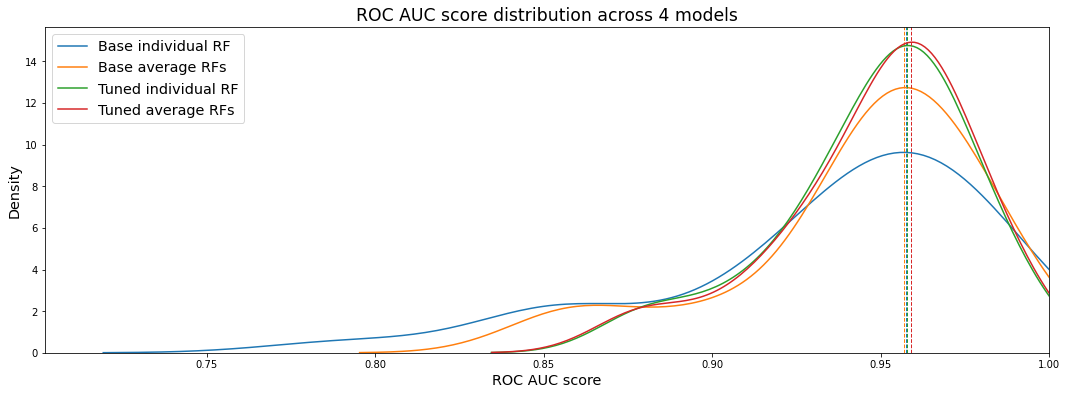

In [81]:
model_AUCs_list = [('Base individual RF', base_individual_AUCs), ('Base average RFs', base_average_AUCs),
                   ('Tuned individual RF', individual_AUCs), ('Tuned average RFs', average_AUCs)]

fig, ax = plt.subplots(figsize = (18, 6))

for i in range(len(model_AUCs_list)):
    color = next(ax._get_lines.prop_cycler)['color']
    
    AUC_distribution = sns.kdeplot(x = model_AUCs_list[i][1],
                                   ax = ax,
                                   label = model_AUCs_list[i][0],
                                   color = color
                                  )
    
    x_coord = ax.lines[-1].get_xdata()
    y_coord = ax.lines[-1].get_ydata()
    index_of_max_y = np.argmax(y_coord)
    ax.axvline(x_coord[index_of_max_y], linestyle = '--', linewidth = 1, color = color)

ax.legend(loc = 'upper left', fontsize = 'x-large')
plt.title('ROC AUC score distribution across 4 models', fontsize = 'xx-large')
plt.xlabel('ROC AUC score', fontsize = 'x-large')
plt.ylabel('Density', fontsize = 'x-large')
plt.xlim(right = 1)

plt.show()

It is evident that hyperparameter tuning reduced the variance of ROC AUC scores as indicated by the spread of the green and red curves.

Also, the ROC AUC score for tuned ensemble average of random forests (red vertical line) is more likely to be higher compared to the 3 other models, as seen by the vertical line indicators of their respective peaks.

# Final Model

In [82]:
final_models = best_models

In [83]:
proba = []

for model in final_models:
    model.fit(X, y)

    proba_rforest = model.predict_proba(X_kaggle)[:,1]
    proba.append(proba_rforest)

result = np.mean(proba, axis = 0)
result

array([8.93832834e-05, 2.80789786e-02, 2.93559268e-02, ...,
       1.48966510e-01, 8.14483623e-05, 2.83981250e-02])

In [84]:
output_dataframe = pd.DataFrame({
    'bidder_id': test_set['bidder_id'],
    'prediction': result
})
output_dataframe.to_csv('my_predictions.csv', index=False) 


[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100, total=   0.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200, total=   1.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_leaf=8, random

---